In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
from PIL import Image
import csv

import sys 
import os
sys.path.append(os.path.abspath("~/vAkyapaJcAGgam/SPA_c_implementation"))
import siddhanta_model

def to_rdm(deg_value):
    sign = deg_value/np.abs(deg_value)
    deg_value=np.abs(deg_value)
    ans = []
    ans.append((deg_value//30)*sign)
    deg_value = (deg_value%30)
    ans.append(np.floor(deg_value))
    deg_value = (deg_value - np.floor(deg_value))*60
    ans.append(np.floor(deg_value))
    deg_value = (deg_value - np.floor(deg_value))*60
    ans.append(np.floor(deg_value))
    deg_value = (deg_value - np.floor(deg_value))*60
    ans.append(np.floor(deg_value))
    deg_value = (deg_value - np.floor(deg_value))*60
    ans.append(np.floor(deg_value))
    return ans

def to_dms(deg_value):
    sign = deg_value/np.abs(deg_value)
    deg_value=np.abs(deg_value)
    ans = []
    ans.append((deg_value//1)*sign)
    deg_value = (deg_value - np.floor(deg_value))*60
    ans.append(np.floor(deg_value))
    deg_value = (deg_value - np.floor(deg_value))*60
    ans.append(np.floor(deg_value))
    deg_value = (deg_value - np.floor(deg_value))*60
    ans.append(np.floor(deg_value))
    deg_value = (deg_value - np.floor(deg_value))*60
    ans.append(np.floor(deg_value))
    return ans

sun_revs = 4320000
civ_days = 1577917500

mandocca = 78

theta_0 = lambda ahargana: ((ahargana*sun_revs/civ_days)%1)*360
theta_t = lambda ahargana: (theta_0(ahargana) - np.rad2deg(np.arcsin((13.5/360)*np.sin(np.deg2rad(theta_0(ahargana)-mandocca)))))%360

def set_target_na_longitude(target, ahargana):
    epsilon = 0.000000001
    while np.abs(target-theta_t(ahargana)) >= epsilon:
        # print("ah=%f, tl=%f, tgt=%f"%(ahargana, theta_t(ahargana), target))
        ahargana = ahargana - (theta_t(ahargana)-target)
    return ahargana
        # print(ahargana, theta_0(ahargana), theta_t(ahargana), target-theta_t(ahargana))

def generate_vakyas(ahargana):
    tls = [0]
    v = [0]
    for i in [1,2,3,4,5]:
        tls.append(theta_t(ahargana))
        v.append(tls[i]-tls[i-1]-8)
        # print("ahargana=%f,\tml=%f\ttl=%f\tv=%f"%(ahargana, theta_0(ahargana), theta_t(ahargana), v[i]))
        print("%f,%f,%f,%f=%s"%(ahargana, theta_0(ahargana), theta_t(ahargana), v[i], to_rdm(v[i])))
        # print("ml=",to_dms(theta_0(ahargana)))
        # print("tl=",to_dms(theta_t(ahargana)))
        # print("\t\t\t\t\t\t\t\t\t\tvakya=",to_rdm(v[i]))
        ahargana = ahargana + 8

R   = 1
r0  = 3/80
Rv  = lambda ahargana: np.sqrt(R**2-(r0*np.sin(theta_t(ahargana)*np.pi/180-mandocca))**2)-r0*np.cos(theta_t(ahargana)*np.pi/180-mandocca)
K   = lambda ahargana: R**2/Rv(ahargana)

jd_from_ag = lambda ahargana: ahargana + 588464.54
ag_from_jd = lambda jd: jd - 588464.54

moon_orb_circumference = 21600*10 #yojanas
moon_revs              = 57753336
dist_travelled_my      = moon_orb_circumference*moon_revs
sun_orb_circumference  = dist_travelled_my/sun_revs

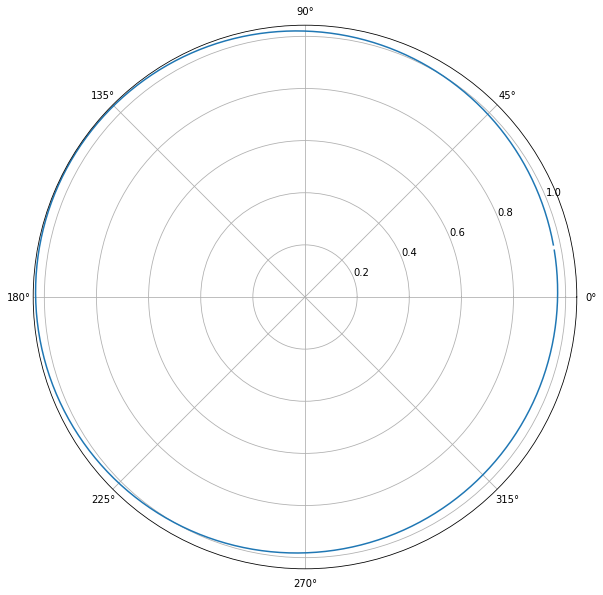

In [6]:
init_ag = 10

plt.polar([theta_t(ag)*np.pi/180 for ag in range(init_ag, init_ag+365)], [K(ag) for ag in range(init_ag, init_ag+365)])

fig = plt.gcf()
fig.set_size_inches(10, 10)

In [7]:
ahargana = 1754000

ahargana = set_target_na_longitude(360, ahargana)

print("ahargana =", ahargana)
print("true longitude =", to_rdm(theta_t(ahargana)))
print("mean longitude =", to_rdm(theta_0(ahargana)))
# print("mean - true    =", to_rdm(theta_0(ahargana)-theta_t(ahargana)))

print("\n---generating vakyas---\n")

for i in range(0, 12):
    ahargana = set_target_na_longitude(i*30, ahargana)
    generate_vakyas(ahargana)

ahargana = 1754335.2945913158
true longitude = [11.0, 29.0, 59.0, 59.0, 59.0, 59.0]
mean longitude = [11.0, 27.0, 52.0, 58.0, 6.0, 54.0]

---generating vakyas---

1753970.035911,357.882810,0.000000,-8.000000=[-0.0, 7.0, 59.0, 59.0, 59.0, 59.0]
1753978.035911,5.767633,7.814176,-0.185824=[-0.0, 0.0, 11.0, 8.0, 58.0, 1.0]
1753986.035911,13.652455,15.589644,-0.224532=[-0.0, 0.0, 13.0, 28.0, 18.0, 56.0]
1753994.035911,21.537278,23.328478,-0.261165=[-0.0, 0.0, 15.0, 40.0, 11.0, 42.0]
1754002.035911,29.422101,31.033448,-0.295030=[-0.0, 0.0, 17.0, 42.0, 6.0, 34.0]
1754000.960968,28.362634,30.000000,22.000000=[0.0, 22.0, 0.0, 0.0, 0.0, 0.0]
1754008.960968,36.247457,37.678385,-0.321615=[-0.0, 0.0, 19.0, 17.0, 48.0, 50.0]
1754016.960968,44.132280,45.329729,-0.348656=[-0.0, 0.0, 20.0, 55.0, 9.0, 42.0]
1754024.960968,52.017103,52.958450,-0.371279=[-0.0, 0.0, 22.0, 16.0, 36.0, 21.0]
1754032.960968,59.901926,60.569389,-0.389060=[-0.0, 0.0, 23.0, 20.0, 37.0, 2.0]
1754032.361944,59.311526,60.000000,52.

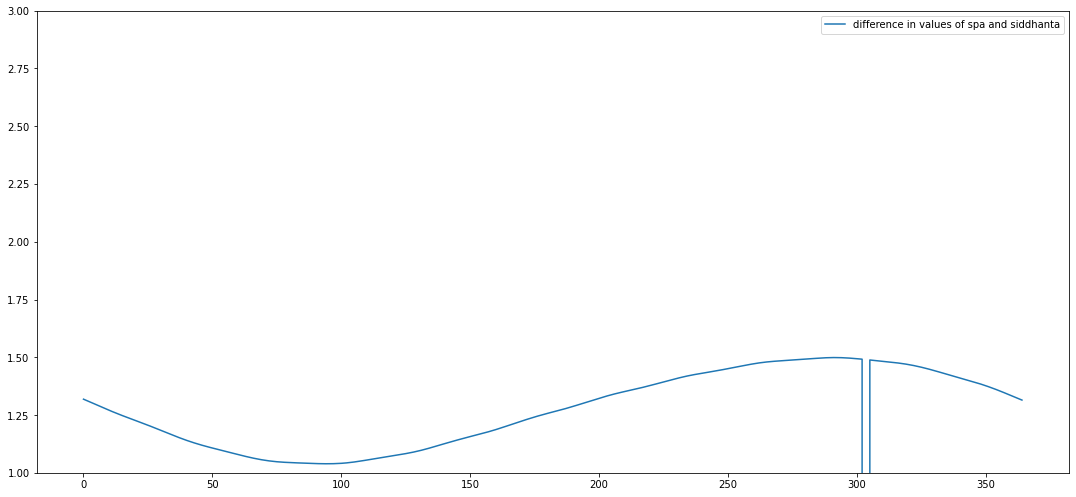

In [8]:
ahargana = set_target_na_longitude(60,1753970.035911)
days = [i for i in range(365)]
sid_thetas = [theta_t(ahargana+i) for i in range(365)]
spa_thetas = pd.read_csv('./tables/spa_the_rs_1703.csv')['theta_na']

# plt.plot(days, sid_thetas, label = 'siddhanta values')
# plt.plot(days, spa_thetas, label = 'spa values')

plt.plot(days, np.subtract(sid_thetas, spa_thetas), label = 'difference in values of spa and siddhanta')

def fig2img(fig):
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img
fig = plt.gcf()
fig.set_size_inches(18.5, 8.5)
img = fig2img(fig)

plt.ylim(1,3)

plt.legend()

In [9]:
epsilon = 0.000000001
ahargana = 1753932
target = 360
while np.abs(target-theta_t(ahargana)) >= epsilon:
    ahargana = ahargana - (theta_t(ahargana)-target)
    print(ahargana, theta_0(ahargana), theta_t(ahargana), target-theta_t(ahargana))

1753969.7011478327 357.5528664261583 359.67214662067937 0.3278533793206293
1753970.029001212 357.8759996545341 359.9932337754783 0.00676622452169795
1753970.0357674365 357.88266846466286 359.99985964906216 0.00014035093784059427
1753970.0359077875 357.882806794878 359.9999970883466 2.9116533823980717e-06
1753970.035910699 357.88280966469756 359.9999999396827 6.031729071764858e-08
1753970.0359107594 357.88280972428765 359.999999998889 1.1110046216344927e-09
1753970.0359107605 357.8828097252699 359.99999999986494 1.3505996321327984e-10


In [10]:
spa_longs_2023ad = pd.read_csv('./tables/spa_yogyadi_vakyas_2023AD.csv')['true_long (na)']
spa_longs_1701ad = pd.read_csv('./tables/spa_yogyadi_vakyas_1701AD.csv')['true_long (na)']
spa_longs_1000ad = pd.read_csv('./tables/spa_yogyadi_vakyas_1000AD.csv')['true_long (na)']
spa_longs_498ad = pd.read_csv('./tables/spa_yogyadi_vakyas_498AD.csv')['true_long (na)']
sid_longs = pd.read_csv('./tables/siddhanta_yogyadi_vakyas.csv')['true_long']

plt.title('Yogyadi Vakyas')

plt.plot(range(60), np.subtract(sid_longs, spa_longs_2023ad), 'r.-', label='2023 Error')
plt.plot(range(60), np.subtract(sid_longs, spa_longs_1701ad), 'b.-', label='1701 Error')
plt.plot(range(60), np.subtract(sid_longs, spa_longs_1000ad), 'y.-', label='1000 Error')
plt.plot(range(60), np.subtract(sid_longs, spa_longs_498ad), 'g.-', label='498 Error')

plt.xlabel('starting at each sankranti, 8 day interval')
plt.ylabel('Difference between spa and siddhanta (degrees)')

fig = plt.gcf()
fig.set_size_inches(20, 10)

plt.ylim(-0.2,0.2)
plt.legend()

KeyError: 'true_long'

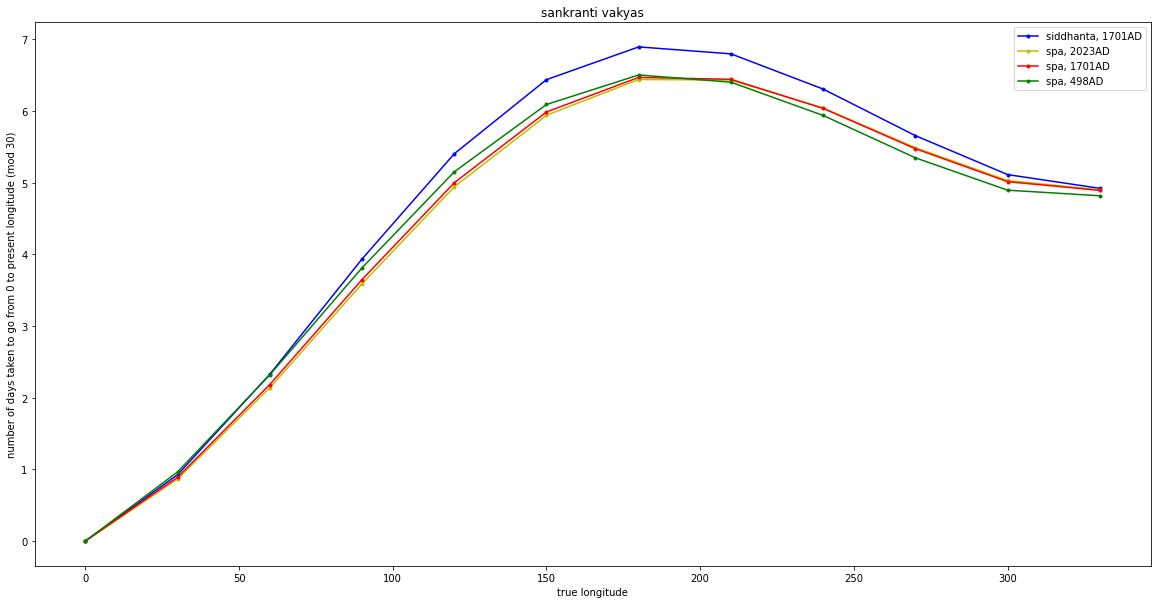

In [ ]:
spa_jd_2023AD = pd.read_csv('./tables/spa_yogyadi_vakyas_2023AD.csv')['jul_day']
spa_jd_1701AD = pd.read_csv('./tables/spa_yogyadi_vakyas_1701AD.csv')['jul_day']
spa_jd_498AD = pd.read_csv('./tables/spa_yogyadi_vakyas_498AD.csv')['jul_day']
sid_ag = pd.read_csv('./tables/siddhanta_yogyadi_vakyas.csv')['ahargana']

plt.title('sankranti vakyas')

plt.plot([30*i for i in range(12)], [sid_ag[5*i]-sid_ag[0]-30*i for i in range(12)],'b.-', label='siddhanta, 1701AD')
plt.plot([30*i for i in range(12)], [spa_jd_2023AD[5*i]-spa_jd_2023AD[0]-30*i for i in range(12)],'y.-', label='spa, 2023AD')
plt.plot([30*i for i in range(12)], [spa_jd_1701AD[5*i]-spa_jd_1701AD[0]-30*i for i in range(12)],'r.-', label='spa, 1701AD')
plt.plot([30*i for i in range(12)], [spa_jd_498AD[5*i]-spa_jd_498AD[0]-30*i for i in range(12)],'g.-', label='spa, 498AD')

plt.xlabel('true longitude')
plt.ylabel('number of days taken to go from 0 to present longitude (mod 30)')

fig = plt.gcf()
fig.set_size_inches(20, 10)

plt.legend()
plt.show()

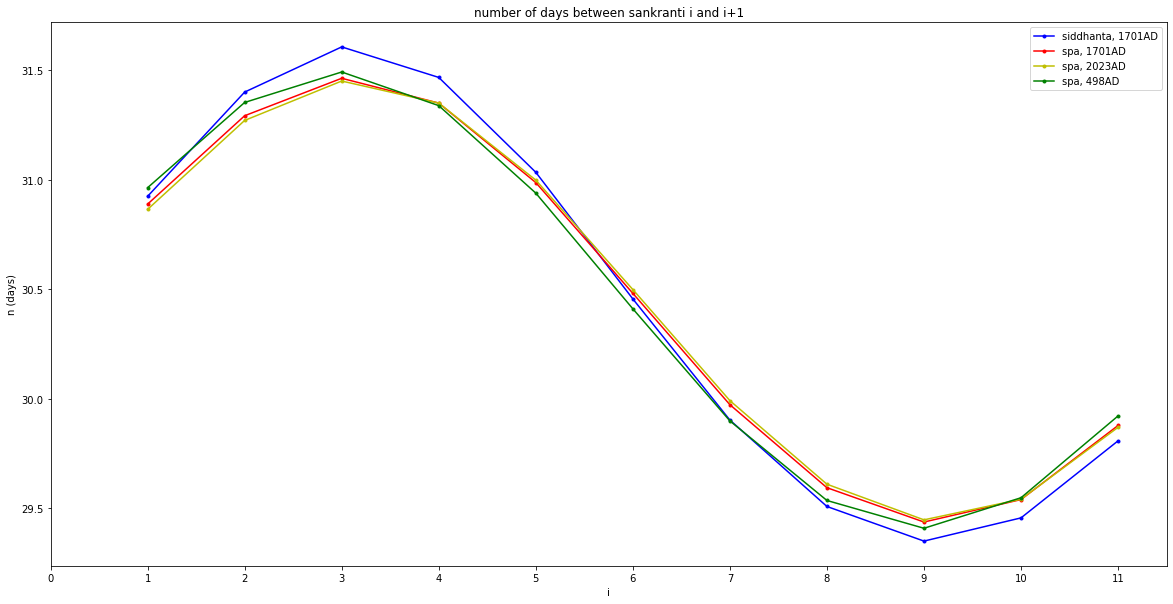

In [ ]:
plt.title('number of days between sankranti i and i+1')

plt.plot([i+1 for i in range(11)], [sid_ag[5*i+5]-sid_ag[5*i] for i in range(11)],'b.-', label='siddhanta, 1701AD')
plt.plot([i+1 for i in range(11)], [spa_jd_1701AD[5*i+5]-spa_jd_1701AD[5*i] for i in range(11)],'r.-', label='spa, 1701AD')
plt.plot([i+1 for i in range(11)], [spa_jd_2023AD[5*i+5]-spa_jd_2023AD[5*i] for i in range(11)],'y.-', label='spa, 2023AD')
plt.plot([i+1 for i in range(11)], [spa_jd_498AD[5*i+5]-spa_jd_498AD[5*i] for i in range(11)],'g.-', label='spa, 498AD')

plt.xlabel('i')
plt.xticks(range(12))
plt.ylabel('n (days)')

fig = plt.gcf()
fig.set_size_inches(20, 10)

plt.legend()
plt.show()

In [ ]:
init_ahargana = 1242000
fin_ahargana = init_ahargana + 365*400
ahargana = init_ahargana
print("Starting at Ahargana %f = Julian Day %f"%(ahargana, ahargana+588464.54))

with open("./tables/siddhanta_longitudes_ag%s.csv"%f'{init_ahargana}', 'w', newline="", ) as sid_longs_csv:
    data = [[ahargana, theta_t(ahargana)] for ahargana in range(init_ahargana, fin_ahargana, 5)]
    csv.writer(sid_longs_csv).writerow(['ahargana','longitude'])
    csv.writer(sid_longs_csv).writerows(data)

print("Successfully generated file ./tables/siddhanta_longitudes_ag%s.csv"%f'{init_ahargana}')

Starting at Ahargana 1242000.000000 = Julian Day 1830464.540000
Successfully generated file ./tables/siddhanta_longitudes_ag1242000.csv


No handles with labels found to put in legend.


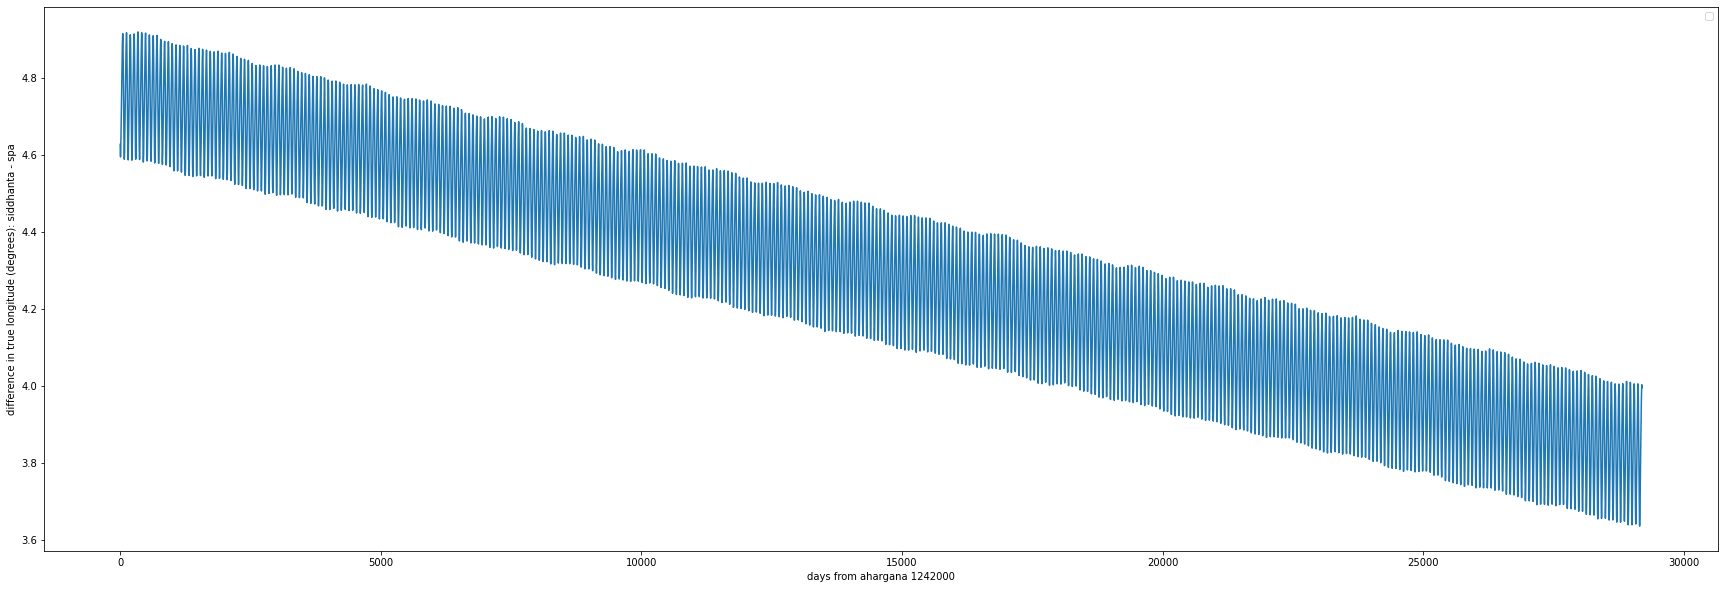

In [ ]:
sid_longs = pd.read_csv('./tables/siddhanta_longitudes_ag1242000.csv')
spa_longs = pd.read_csv('./tables/spa_longitudes_and_distances_jd1830464.540000.csv')

plt.plot(range(len(sid_longs['longitude'])), [(sid_longs['longitude'][i] - spa_longs['theta_na'][i])%360 for i in range(len(sid_longs['longitude']))])

plt.xlabel('days from ahargana 1242000')
plt.ylabel('difference in true longitude (degrees): siddhanta - spa')

fig = plt.gcf()
fig.set_size_inches(30, 10)

plt.legend()
plt.show()

1.037384347258205